Accuracy: 0.53


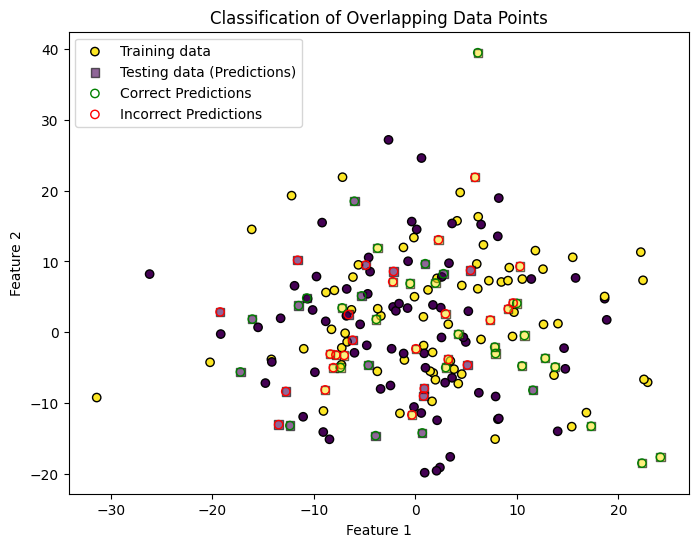

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=[(0, 0), (1, 1)], cluster_std=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

# Visualize the results
plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training data', edgecolor='k')

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='s', label='Testing data (Predictions)', edgecolor='k', alpha=0.6)

# Highlight the correct predictions from test data
correct = y_test == y_pred
plt.scatter(X_test[correct, 0], X_test[correct, 1], facecolors='none', edgecolor='g', label='Correct Predictions')

# Highlight the incorrect predictions from test data
incorrect = ~correct
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], facecolors='none', edgecolor='r', label='Incorrect Predictions')

plt.title("Classification of Overlapping Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

F1 Score: 0.48


/var/folders/9l/_y964wyn5fx6bcqmbqjpd9780000gp/T/ipykernel_37034/3780866602.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  c1 = np.random.multivariate_normal([m1, m1], [[0, 0.1], [0.1, 0]], 100)
/var/folders/9l/_y964wyn5fx6bcqmbqjpd9780000gp/T/ipykernel_37034/3780866602.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  c2 = np.random.multivariate_normal([m2, m2], [[0, 0.1], [0.1, 0]], 100)


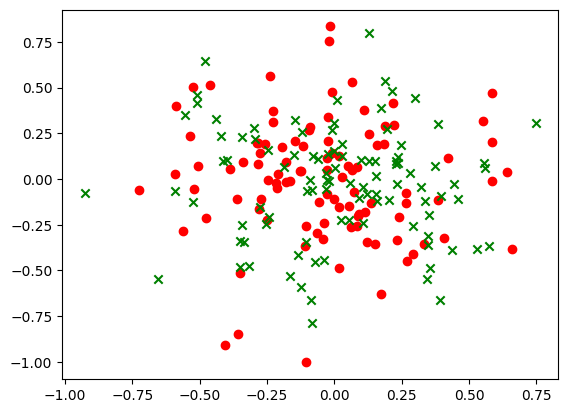

In [29]:
# gnerate 2d normally distributed data
m1 = 0
c1 = np.random.multivariate_normal([m1, m1], [[0, 0.1], [0.1, 0]], 100)
plt.scatter(c1[:, 0], c1[:, 1], c='r', marker='o', label='Class 1')

m2 = 0
c2 = np.random.multivariate_normal([m2, m2], [[0, 0.1], [0.1, 0]], 100)
plt.scatter(c2[:, 0], c2[:, 1], c='g', marker='x', label='Class 2')

data = np.vstack((c1, c2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, np.hstack((np.zeros(100), np.ones(100))), test_size=0.3, random_state=42)

# Initialize the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the test set
y_pred = classifier.predict(X_test)

# Calculate the f1 score
accuracy = f1_score(y_test, y_pred)
print(f"F1 Score: {accuracy:.2f}")

In [30]:
import pandas as pd

In [32]:
pd.read_parquet("yellow_tripdata_2024-01.parquet")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


/var/folders/9l/_y964wyn5fx6bcqmbqjpd9780000gp/T/ipykernel_41608/2978967589.py:84: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.stripplot(data=df, x='Gamma', y=value_col, hue='Group', dodge=True,


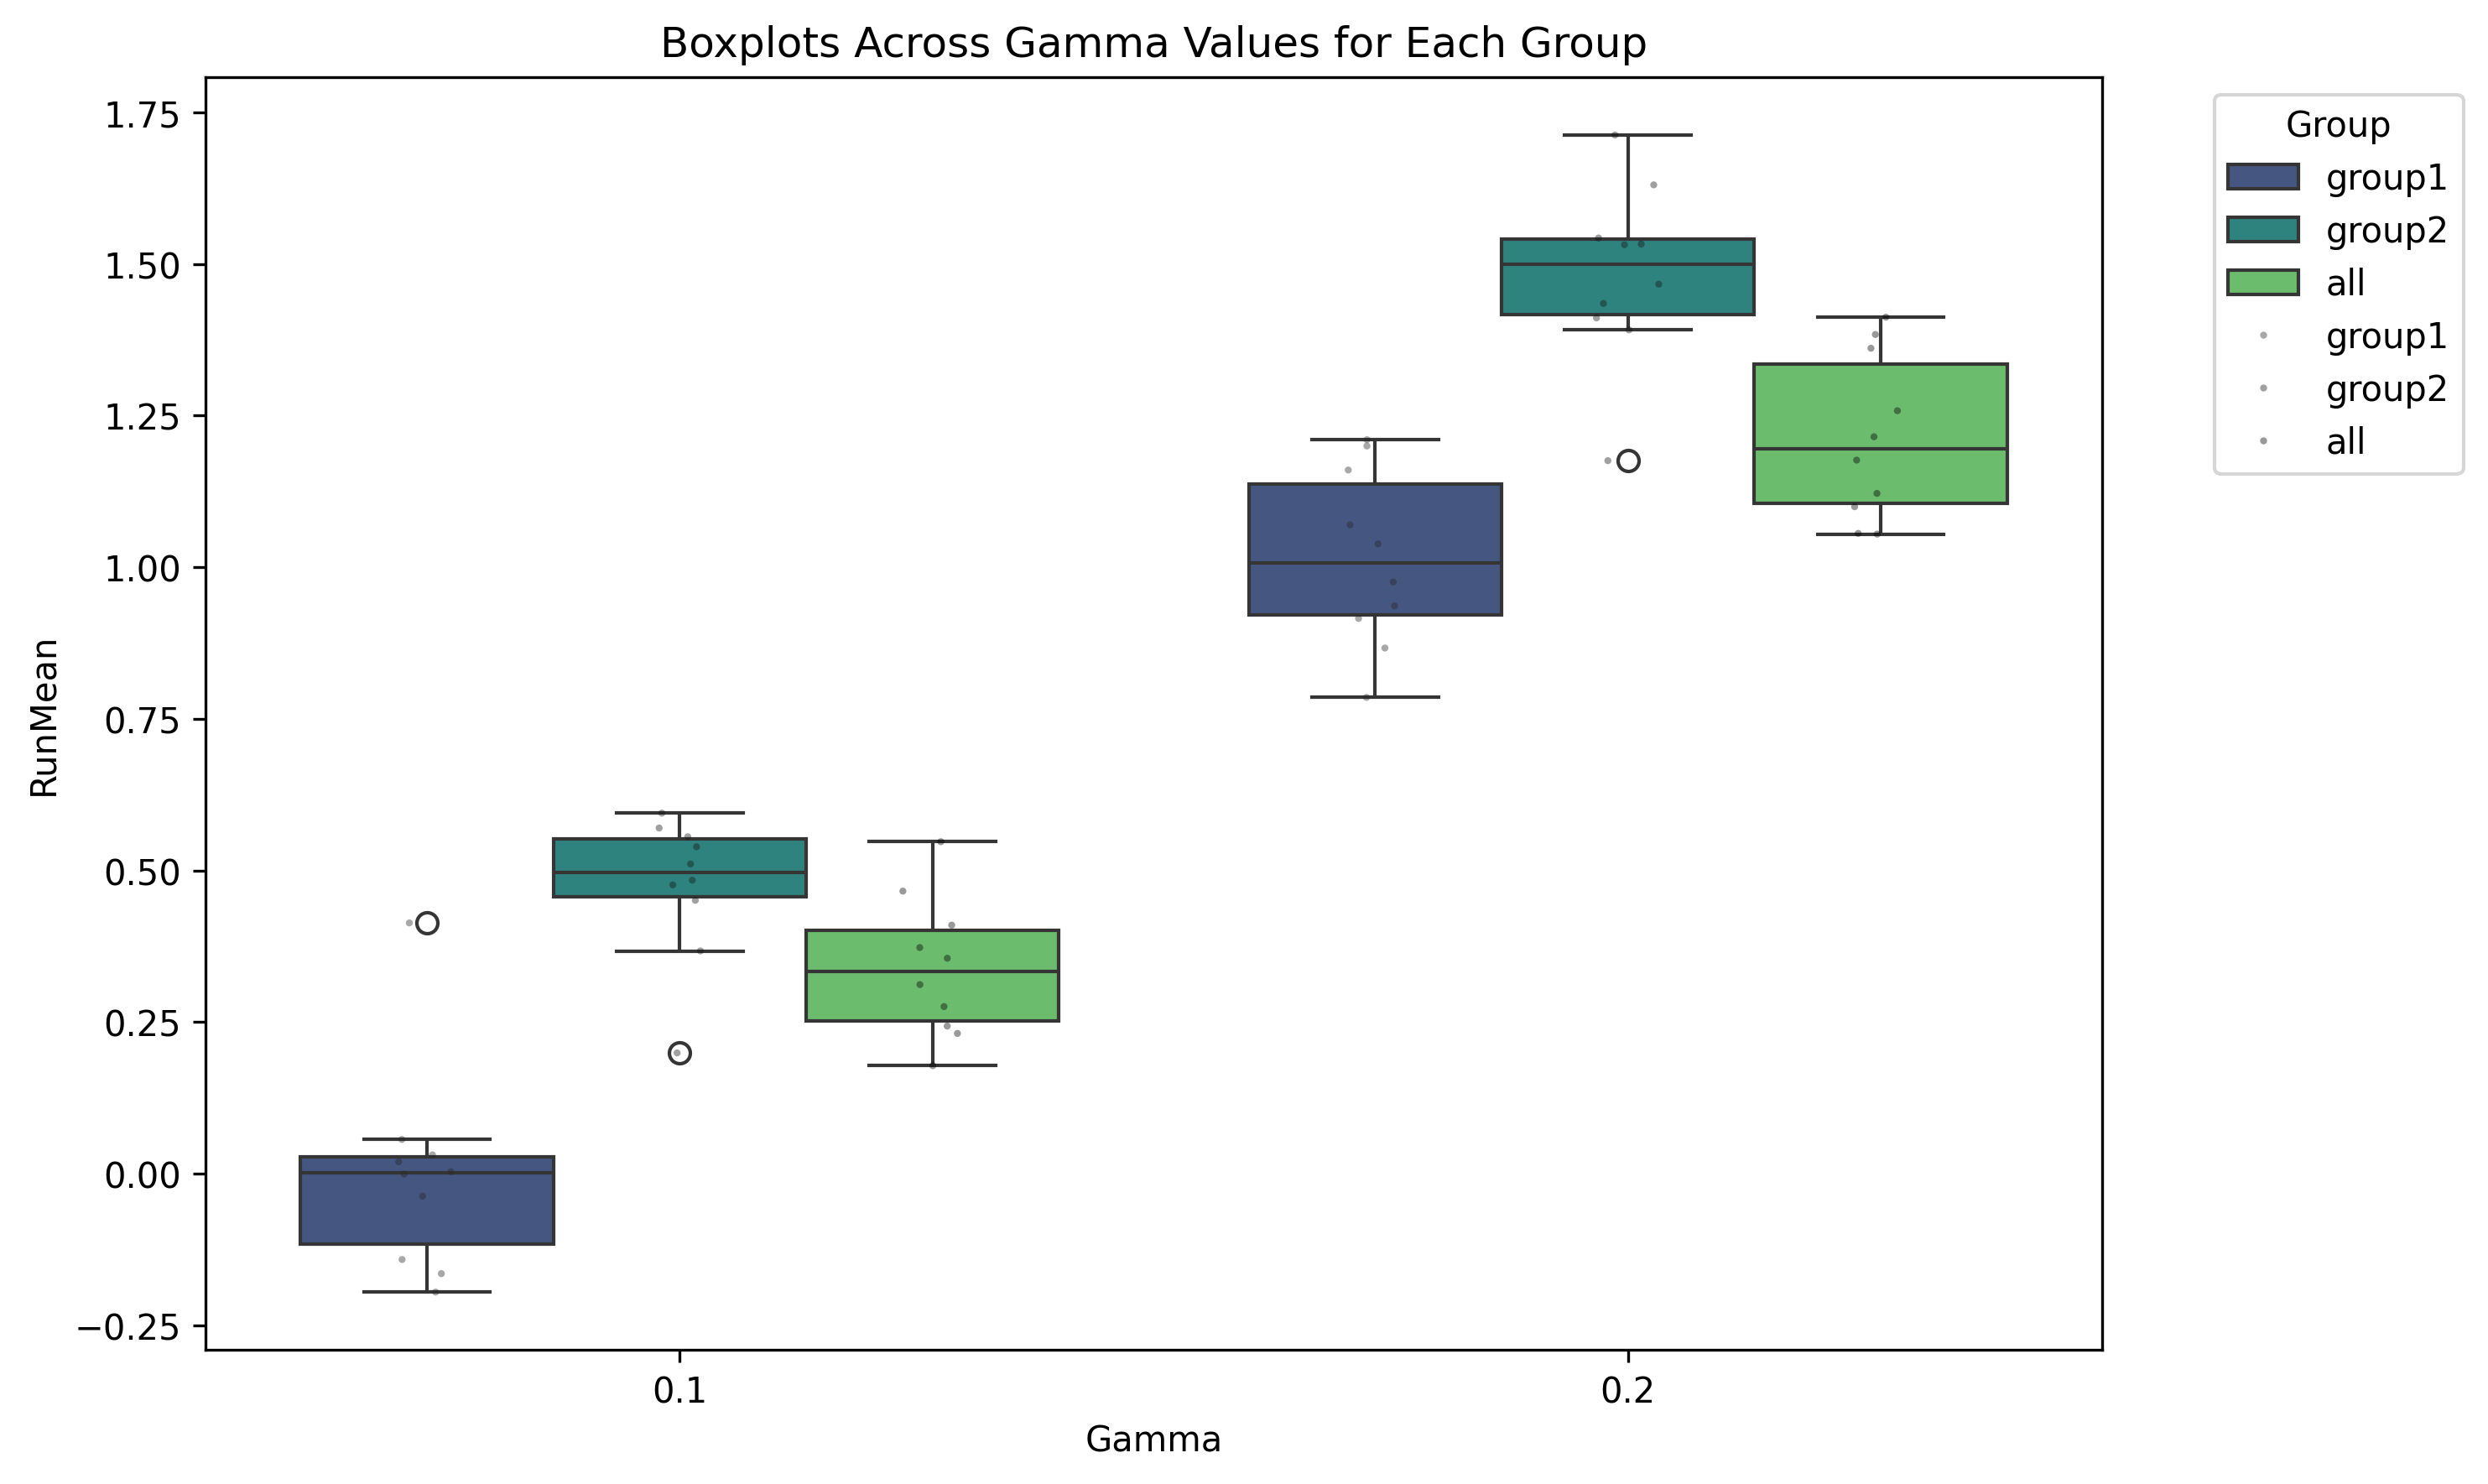

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose 'results' is your nested dictionary structured as:
# results = {
#     group_name: {
#         alpha: {
#             gamma: [run1, run2, ...],  # each run is an array or list of measurements
#             ...
#         },
#         ...
#     },
#     ...
# }

# Example: A dummy results dictionary for illustration. Remove or replace with your actual data.
results = {
    'group1': {
        'alpha1': {
            0.1: [np.random.normal(loc=0, scale=1, size=50) for _ in range(10)],
            0.2: [np.random.normal(loc=1, scale=1, size=50) for _ in range(10)],
        },
    },
    'group2': {
        'alpha1': {
            0.1: [np.random.normal(loc=0.5, scale=1, size=50) for _ in range(10)],
            0.2: [np.random.normal(loc=1.5, scale=1, size=50) for _ in range(10)],
        },
    },
    'all': {
        'alpha1': {
            0.1: [np.random.normal(loc=0.3, scale=1, size=50) for _ in range(10)],
            0.2: [np.random.normal(loc=1.2, scale=1, size=50) for _ in range(10)],
        },
    }
}

# Prepare the list of dictionaries for DataFrame construction.
data_list = []
for group_name, group_results in results.items():
    for alpha, alpha_results in group_results.items():
        for gamma, runs in alpha_results.items():
            # Instead of using only the mean, you have options:
            # Option A: Use the run means to show distribution between runs.
            for run in runs:
                run_mean = np.mean(run)
                data_list.append({
                    'Group': group_name,
                    'Alpha': alpha,
                    'Gamma': gamma,
                    'RunMean': run_mean
                })

            # Option B: If you want all individual observations:
            # for run in runs:
            #     for value in run:
            #         data_list.append({
            #             'Group': group_name,
            #             'Alpha': alpha,
            #             'Gamma': gamma,
            #             'Value': value
            #         })

# Convert the list to a DataFrame.
df = pd.DataFrame(data_list)

# Choose which value to plot, e.g., 'RunMean' or 'Value' depending on your option.
value_col = 'RunMean'  # switch to 'Value' if using Option B

# Set up the figure.
plt.figure(figsize=(10, 6), dpi=300)
sns.set_palette(sns.color_palette("viridis", len(results.keys())))

# Create the boxplot.
# If you want to compare groups side-by-side for each gamma value:
sns.boxplot(data=df, x='Gamma', y=value_col, hue='Group')
plt.title('Boxplots Across Gamma Values for Each Group')
plt.xlabel('Gamma')
plt.ylabel(value_col)

# Optionally, overlay the individual data points (for clarity, use jitter).
sns.stripplot(data=df, x='Gamma', y=value_col, hue='Group', dodge=True,
              alpha=0.4, color='k', size=2)

plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
